/tmp/ipykernel_3905/3717123929.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


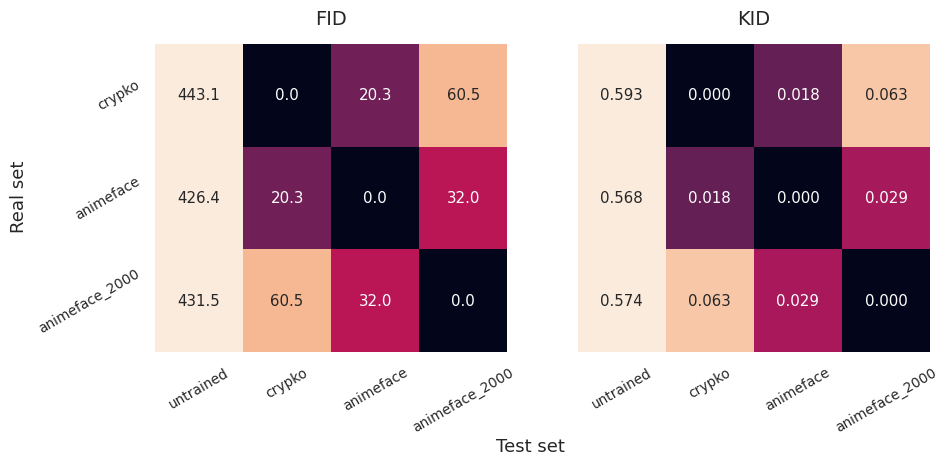

In [41]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LogNorm

fids = [ [  443.1, 426.4, 431.5 ],
          [   0.0,  20.3,  60.5 ],
          [  20.3,   0.0,  32.0 ],
          [  60.5,  32.0,   0.0 ] ]

kids = [ [  0.5933,  0.5675,  0.5737 ],
         [  0.0,     0.0183,  0.0634 ],
         [  0.0182,  0.0,     0.0290 ],
         [  0.0634,  0.0288,  0.0 ] ]

index = [ 'untrained', 'crypko', 'animeface', 'animeface_2000' ]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

fids_df = pd.DataFrame(fids, index, index[1:]).fillna(value=np.nan).T
sn.set(font_scale=0.9)
sn.heatmap(fids_df, ax=ax1, annot=True, fmt=".1f", cbar=False, vmin=0, vmax=70)
ax1.tick_params(axis="both", rotation=30)

kids_df = pd.DataFrame(kids, index, index[1:]).fillna(value=np.nan).T
sn.set(font_scale=0.9)
sn.heatmap(kids_df, ax=ax2, annot=True, fmt=".3f", cbar=False, vmin=0, vmax=0.07)
ax2.tick_params(axis="both", rotation=30)

ax1.set_title('FID', pad=14, size=14, weight=500)
ax2.set_title('KID', pad=14, size=14, weight=500)
ax2.set_yticks([])
fig.supxlabel('Test set', y=-0.15, weight=500)
fig.supylabel('Real set', x=-0.02, weight=500)

# plt.yticks(rotation=30)
# plt.xticks(rotation=30)
# plt.xlabel('Test set')
# plt.ylabel('Real set')

fig.savefig('metrics_baseline_cm.png', dpi=300, bbox_inches='tight')
fig.show()

